En este caso se busca desarrollar un programa capaz de clasificar digitos escritos a mano. Para ello se trabaja con una base de datos brindada por scikit learn.

In [1]:
import numpy as np
#import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Se abre la base de datos, se transforman los targets a enteros y se ordena la base en funcion a estos

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

In [3]:
# Se consulta el tamaño del data set
mnist.data.shape

(70000, 784)

In [4]:
X, y = mnist["data"], mnist["target"]

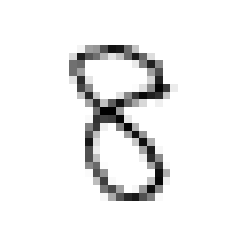

In [5]:
# Se grafica un digito

some_digit = X[3600]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

In [6]:
# Se divide en un set de entrenamiento y otro de testeo

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
# Se entrenan algoritmos capaces de clasificar bases de datos con multiples respuestas o targets

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train)

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [8]:
# Se evalua la performance de los clasificadores

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8632 , 0.85775, 0.8599 ])

In [9]:
cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9054 , 0.90725, 0.908  ])

In [10]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9408 , 0.94215, 0.9408 ])

In [11]:
# Se escalan los datos y se evalua si mejora la performance

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [12]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90575, 0.90835, 0.91135])

In [13]:
cross_val_score(ovo_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9175, 0.9191, 0.925 ])

In [14]:
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9407 , 0.9421 , 0.94065])

In [15]:
# Se grafican las matrices de confusión
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx_sgd = confusion_matrix(y_train, y_train_pred_sgd)
conf_mx_sgd

array([[5742,    3,   20,    9,   10,   39,   48,   10,   38,    4],
       [   1, 6466,   50,   29,    6,   37,    7,    9,  124,   13],
       [  57,   38, 5323,  114,   79,   23,   89,   55,  164,   16],
       [  48,   40,  150, 5313,    2,  244,   38,   64,  136,   96],
       [  16,   26,   44,    6, 5354,    9,   52,   36,   88,  211],
       [  72,   48,   40,  183,   78, 4613,  114,   29,  153,   91],
       [  30,   26,   48,    2,   40,   88, 5618,    8,   58,    0],
       [  26,   25,   71,   25,   48,   12,    8, 5786,   14,  250],
       [  52,  148,   73,  159,   14,  153,   57,   28, 5030,  137],
       [  45,   35,   28,   83,  164,   34,    4,  210,   82, 5264]],
      dtype=int64)

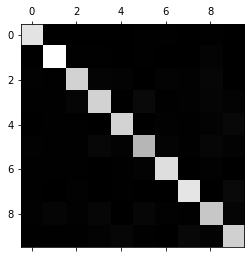

In [16]:
plt.matshow(conf_mx_sgd, cmap=plt.cm.gray)
plt.show()

In [17]:
y_train_pred_ovo = cross_val_predict(ovo_clf, X_train_scaled, y_train, cv=3)
conf_mx_ovo = confusion_matrix(y_train, y_train_pred_ovo)
conf_mx_ovo

array([[5659,    0,   40,   11,    7,   78,   63,    7,   50,    8],
       [   1, 6503,   39,   38,    8,   31,    2,   18,   90,   12],
       [  24,   37, 5381,  136,   66,   23,   58,   53,  164,   16],
       [   9,   19,  124, 5470,    7,  247,    9,   52,  149,   45],
       [   6,   19,   56,    9, 5417,   11,   36,   24,   42,  222],
       [  29,    7,   42,  205,   27, 4772,   65,   10,  217,   47],
       [  29,    8,   82,   10,   28,   84, 5638,    2,   37,    0],
       [   9,   12,   74,   43,   59,   15,    3, 5817,   36,  197],
       [  21,   66,   85,  170,   13,  159,   31,   14, 5240,   52],
       [  14,   17,   20,   74,  163,   38,    2,  219,   67, 5335]],
      dtype=int64)

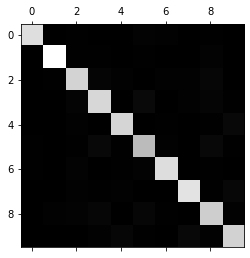

In [18]:
plt.matshow(conf_mx_ovo, cmap=plt.cm.gray)
plt.show()

In [19]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx_forest = confusion_matrix(y_train, y_train_pred_forest)
conf_mx_forest

array([[5807,    2,   19,    9,   11,   15,   23,    4,   29,    4],
       [   2, 6619,   37,   22,   13,   13,    3,   14,   10,    9],
       [  49,   24, 5632,   51,   39,   14,   31,   45,   60,   13],
       [  25,   28,  149, 5618,   10,  119,    6,   53,   88,   35],
       [  15,   19,   32,    7, 5538,    9,   33,   19,   23,  147],
       [  42,   18,   30,  199,   29, 4953,   50,   10,   50,   40],
       [  48,   14,   36,    7,   30,   74, 5686,    0,   23,    0],
       [  14,   23,   91,   33,   59,    3,    0, 5932,   15,   95],
       [  32,   40,   84,  125,   62,  104,   39,   10, 5281,   74],
       [  31,   16,   31,   93,  170,   43,    8,   92,   62, 5403]],
      dtype=int64)

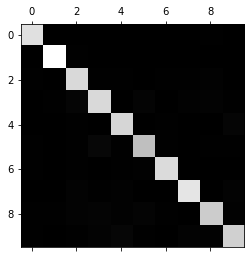

In [20]:
plt.matshow(conf_mx_forest, cmap=plt.cm.gray)
plt.show()

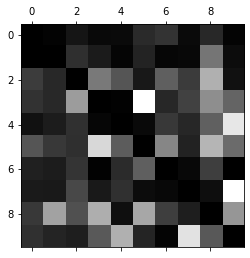

In [21]:
# Se normalizan las matrices de confusion y se llena la diagonal de ceros para evaluar que numero se esta confundiendo el algoritmo

row_sums_sgd = conf_mx_sgd.sum(axis=1, keepdims=True)
norm_conf_mx_sgd = conf_mx_sgd / row_sums_sgd
np.fill_diagonal(norm_conf_mx_sgd, 0)
plt.matshow(norm_conf_mx_sgd, cmap=plt.cm.gray)
plt.show()

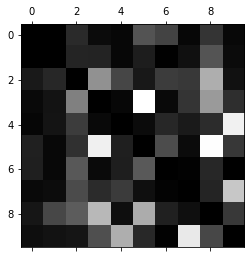

In [22]:
row_sums_ovo = conf_mx_ovo.sum(axis=1, keepdims=True)
norm_conf_mx_ovo = conf_mx_ovo / row_sums_ovo
np.fill_diagonal(norm_conf_mx_ovo, 0)
plt.matshow(norm_conf_mx_ovo, cmap=plt.cm.gray)
plt.show()

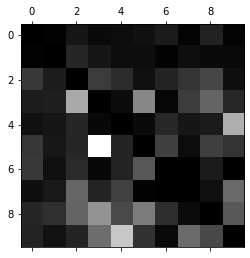

In [23]:
row_sums_forest = conf_mx_forest.sum(axis=1, keepdims=True)
norm_conf_mx_forest = conf_mx_forest / row_sums_forest
np.fill_diagonal(norm_conf_mx_forest, 0)
plt.matshow(norm_conf_mx_forest, cmap=plt.cm.gray)
plt.show()

In [24]:
# Se evalua la precision de cada algoritmo

y_test_pred_sgd = sgd_clf.predict(X_test)
sgd_score = accuracy_score(y_test, y_test_pred_sgd)

y_test_pred_ovo = ovo_clf.predict(X_test)
ovo_score = accuracy_score(y_test, y_test_pred_ovo)

y_test_pred_forest = forest_clf.predict(X_test)
forest_score = accuracy_score(y_test, y_test_pred_forest)


d = {'Algorithm': ['SGD', 'OVO', 'Random Forest'], 'Score': [sgd_score, ovo_score, forest_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Algorithm,Score
0,SGD,0.8702
1,OVO,0.9113
2,Random Forest,0.9481


Los tres algoritmos presentan un puntaje elevado. Se podria mejorar el resultado mediante el preprocesamiento (ej. escalado) de los datos o haciendo hincapie en los numeros que el programa confunde con mayor frecuencia (ej. 3-8 y 7-9). Esto ultimo se alcanzaria si agrega una porcion de programa capaz de identificar el numero de vueltas cerradas, ya que el digito 3 no posee ninguna, 8 posee dos, 7 no posee ninguna y 9 posee solo una.